# **Bioinformatics Project - Computational Drug Discovery - Comparing Regressors**


In Part 4, we will be comparing several ML algorithms to build regression models of MAO-B inhibitors.

## **Importing the libraries**

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Loading the data set**


In [3]:
df = pd.read_csv('bioactivity_data_pIC50_pubchem_fp.csv')
df=df.dropna()
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.74
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.05
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3931,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3932,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3933,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52


In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **Data pre-processing**

In [5]:
# Examining X dimension
X.shape

(3935, 881)

In [6]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(3935, 141)

In [7]:
# Performing data split using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Comparing ML algorithms**

In [8]:
# Selecting initial 31 regressors
lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS[32:]

In [9]:
# Defines and builds the lazyregressor
clf = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

 10%|█         | 1/10 [00:02<00:21,  2.44s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -4.337915382233683e+22, 'Adjusted R-Squared': -5.2862038611405805e+22, 'RMSE': 329381620024.6326, 'Time taken': 2.4323432445526123}


 20%|██        | 2/10 [00:05<00:24,  3.10s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.45713775805081835, 'Adjusted R-Squared': 0.33846554702006704, 'RMSE': 1.1652084920964099, 'Time taken': 3.555795192718506}
{'Model': 'Ridge', 'R-Squared': 0.230596588660278, 'Adjusted R-Squared': 0.062401424320897014, 'RMSE': 1.387189768511126, 'Time taken': 0.06584048271179199}


 50%|█████     | 5/10 [00:06<00:04,  1.12it/s]

{'Model': 'RidgeCV', 'R-Squared': 0.2406630892254087, 'Adjusted R-Squared': 0.07466850873049813, 'RMSE': 1.3780852320150216, 'Time taken': 0.1444556713104248}
{'Model': 'SGDRegressor', 'R-Squared': 0.22683166426330437, 'Adjusted R-Squared': 0.057813469939468676, 'RMSE': 1.3905795969737733, 'Time taken': 0.1589956283569336}


 70%|███████   | 7/10 [00:09<00:03,  1.08s/it]

{'Model': 'SVR', 'R-Squared': 0.3815762532768665, 'Adjusted R-Squared': 0.2463859458536699, 'RMSE': 1.243660674903841, 'Time taken': 2.7805166244506836}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -4.593825522254438e+22, 'Adjusted R-Squared': -5.5980571480495936e+22, 'RMSE': 338958142684.27704, 'Time taken': 0.14904999732971191}


 80%|████████  | 8/10 [00:09<00:01,  1.19it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.16383073902050882, 'Adjusted R-Squared': -0.018959750588961155, 'RMSE': 1.4461252934345408, 'Time taken': 0.28627753257751465}


 90%|█████████ | 9/10 [00:20<00:03,  3.84s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.44034888400651084, 'Adjusted R-Squared': 0.3180065470218877, 'RMSE': 1.1830892554587116, 'Time taken': 10.754680871963501}


100%|██████████| 10/10 [00:21<00:00,  2.14s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4355188015665621, 'Adjusted R-Squared': 0.31212058609506643, 'RMSE': 1.1881836274594195, 'Time taken': 0.985647439956665}


In [10]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.34,0.46,1.17,3.56
XGBRegressor,0.32,0.44,1.18,10.75
LGBMRegressor,0.31,0.44,1.19,0.99
SVR,0.25,0.38,1.24,2.78
RidgeCV,0.07,0.24,1.38,0.14
Ridge,0.06,0.23,1.39,0.07
SGDRegressor,0.06,0.23,1.39,0.16
TweedieRegressor,-0.02,0.16,1.45,0.29
RANSACRegressor,-52862038611405804929024.00,-43379153822336826736640.00,329381620024.63,2.43


In [11]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.34,0.46,1.17,3.56
XGBRegressor,0.32,0.44,1.18,10.75
LGBMRegressor,0.31,0.44,1.19,0.99
SVR,0.25,0.38,1.24,2.78
RidgeCV,0.07,0.24,1.38,0.14
Ridge,0.06,0.23,1.39,0.07
SGDRegressor,0.06,0.23,1.39,0.16
TweedieRegressor,-0.02,0.16,1.45,0.29
RANSACRegressor,-52862038611405804929024.00,-43379153822336826736640.00,329381620024.63,2.43


## **5. Data visualization of model performance**

[(0.0, 1.0)]

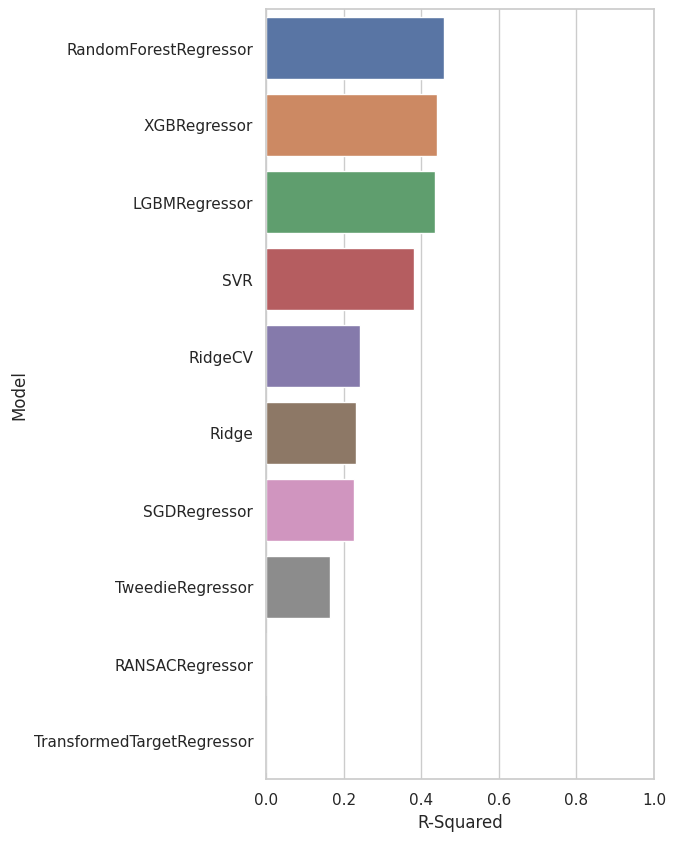

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

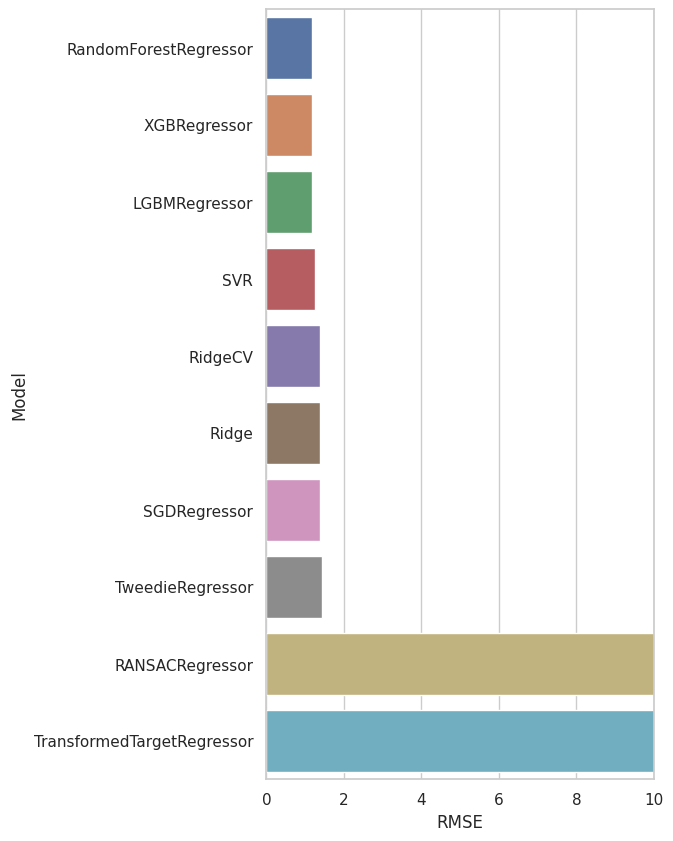

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

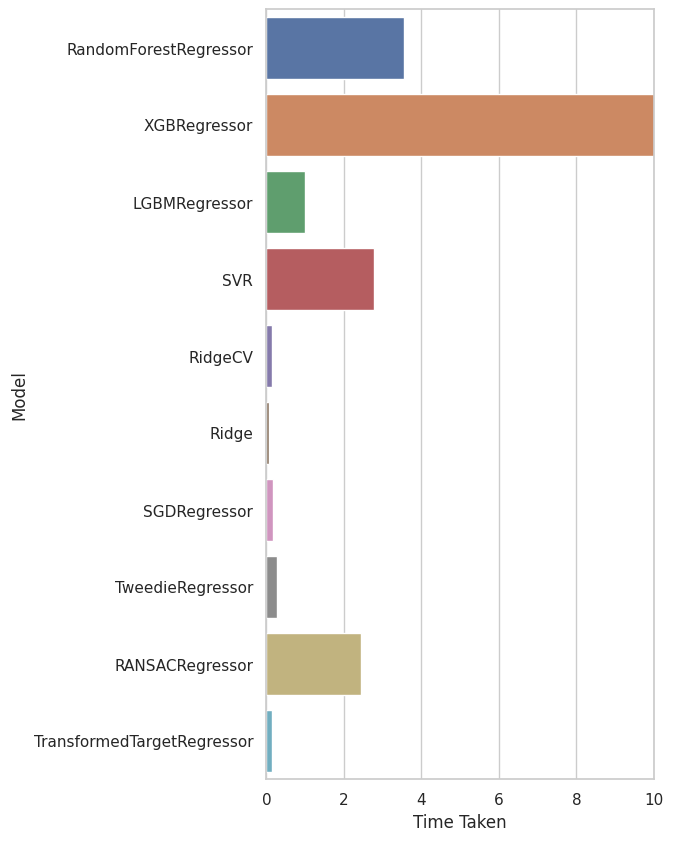

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))